In [2]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import stats
import seaborn as sns; sns.set_theme(color_codes=True)
import os
import matplotlib.pyplot as plt
import sklearn.cluster
import sklearn.metrics
from scipy.stats import f_oneway
import sklearn.datasets
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42
sns.set_style(style='white')

In [4]:
from dask import dataframe as dd

### Load in TCGA Methylation Data

In [5]:
pancan_methylation_tcga = dd.read_csv("../dna_methylation_data/jhu-usc.edu_PANCAN_HumanMethylation450.betaValue_whitelisted.tsv", sample=1000000, delimiter = "\t")

In [6]:
pancan_methylation_tcga["mean_beta"] = pancan_methylation_tcga.mean(axis = 1)
pancan_methylation_tcga.head()

Unnamed: 0  TCGA-OR-A5J1-01A-11D-A29J-05  TCGA-OR-A5J2-01A-11D-A29J-05  \
0  cg00000029                      0.119877                      0.107120   
1  cg00000165                      0.903200                      0.818523   
2  cg00000236                      0.879704                      0.256479   
3  cg00000289                      0.766316                      0.674323   
4  cg00000292                      0.409997                      0.552000   

   TCGA-OR-A5J3-01A-11D-A29J-05  TCGA-OR-A5J4-01A-11D-A29J-05  \
0                      0.060752                      0.157005   
1                      0.093014                      0.856304   
2                      0.253639                      0.940341   
3                      0.750682                      0.842987   
4                      0.851327                      0.847317   

   TCGA-OR-A5J5-01A-11D-A29J-05  TCGA-OR-A5J6-01A-31D-A29J-05  \
0                      0.534426                      0.117144   
1                      0.928812                      0.115994   
2                      0.931214                      0.413085   
3                      0.766848                      0.584756   
4                      0.761502                      0.782867   

   TCGA-OR-A5J7-01A-11D-A29J-05  TCGA-OR-A5J8-01A-11D-A29J-05  \
0                      0.803340                      0.853057   
1                      0.904277                      0.174365   
2                      0.926751                      0.940353   
3                      0.723257                      0.791033   
4                      0.918350                      0.870836   

   TCGA-OR-A5J9-01A-11D-A29J-05  ...  TCGA-ZD-A8I3-01A-11D-A418-05  \
0                      0.611181  ...                      0.585331   
1                      0.898031  ...                      0.566928   
2                      0.919704  ...                      0.701900   
3                      0.833011  ...                      0.328733   
4                      0.887851  ...                      0.873919   

   TCGA-ZH-A8Y1-01A-11D-A418-05  TCGA-ZH-A8Y2-01A-11D-A418-05  \
0                      0.161617                      0.106717   
1                      0.418702                      0.320658   
2                      0.779136                      0.859169   
3                      0.418107                      0.399530   
4                      0.523226                      0.849727   

   TCGA-ZH-A8Y4-01A-11D-A418-05  TCGA-ZH-A8Y5-01A-11D-A418-05  \
0                      0.218970                      0.064768   
1                      0.792981                      0.127150   
2                      0.889698                      0.932694   
3                      0.560327                      0.558825   
4                      0.601534                      0.604496   

   TCGA-ZH-A8Y6-01A-11D-A418-05  TCGA-ZH-A8Y8-01A-51D-A418-05  \
0                      0.102256                      0.168150   
1                      0.083132                      0.133048   
2                      0.848870                      0.798637   
3                      0.529123                      0.455987   
4                      0.857456                      0.853369   

   TCGA-ZU-A8S4-01A-11D-A418-05  TCGA-ZU-A8S4-11A-11D-A418-05  mean_beta  
0                      0.575601                      0.407320   0.332218  
1                      0.299671                      0.129993   0.389384  
2                      0.897517                      0.823814   0.881570  
3                      0.683475                      0.514753   0.676934  
4                      0.810656                      0.713617   0.660821  

[5 rows x 9666 columns]

In [7]:
pancan_methylation_tcga = pancan_methylation_tcga.rename(columns={'Unnamed: 0':'CpG ID'})
pancan_methylation_tcga.head()

CpG ID  TCGA-OR-A5J1-01A-11D-A29J-05  TCGA-OR-A5J2-01A-11D-A29J-05  \
0  cg00000029                      0.119877                      0.107120   
1  cg00000165                      0.903200                      0.818523   
2  cg00000236                      0.879704                      0.256479   
3  cg00000289                      0.766316                      0.674323   
4  cg00000292                      0.409997                      0.552000   

   TCGA-OR-A5J3-01A-11D-A29J-05  TCGA-OR-A5J4-01A-11D-A29J-05  \
0                      0.060752                      0.157005   
1                      0.093014                      0.856304   
2                      0.253639                      0.940341   
3                      0.750682                      0.842987   
4                      0.851327                      0.847317   

   TCGA-OR-A5J5-01A-11D-A29J-05  TCGA-OR-A5J6-01A-31D-A29J-05  \
0                      0.534426                      0.117144   
1                      0.928812                      0.115994   
2                      0.931214                      0.413085   
3                      0.766848                      0.584756   
4                      0.761502                      0.782867   

   TCGA-OR-A5J7-01A-11D-A29J-05  TCGA-OR-A5J8-01A-11D-A29J-05  \
0                      0.803340                      0.853057   
1                      0.904277                      0.174365   
2                      0.926751                      0.940353   
3                      0.723257                      0.791033   
4                      0.918350                      0.870836   

   TCGA-OR-A5J9-01A-11D-A29J-05  ...  TCGA-ZD-A8I3-01A-11D-A418-05  \
0                      0.611181  ...                      0.585331   
1                      0.898031  ...                      0.566928   
2                      0.919704  ...                      0.701900   
3                      0.833011  ...                      0.328733   
4                      0.887851  ...                      0.873919   

   TCGA-ZH-A8Y1-01A-11D-A418-05  TCGA-ZH-A8Y2-01A-11D-A418-05  \
0                      0.161617                      0.106717   
1                      0.418702                      0.320658   
2                      0.779136                      0.859169   
3                      0.418107                      0.399530   
4                      0.523226                      0.849727   

   TCGA-ZH-A8Y4-01A-11D-A418-05  TCGA-ZH-A8Y5-01A-11D-A418-05  \
0                      0.218970                      0.064768   
1                      0.792981                      0.127150   
2                      0.889698                      0.932694   
3                      0.560327                      0.558825   
4                      0.601534                      0.604496   

   TCGA-ZH-A8Y6-01A-11D-A418-05  TCGA-ZH-A8Y8-01A-51D-A418-05  \
0                      0.102256                      0.168150   
1                      0.083132                      0.133048   
2                      0.848870                      0.798637   
3                      0.529123                      0.455987   
4                      0.857456                      0.853369   

   TCGA-ZU-A8S4-01A-11D-A418-05  TCGA-ZU-A8S4-11A-11D-A418-05  mean_beta  
0                      0.575601                      0.407320   0.332218  
1                      0.299671                      0.129993   0.389384  
2                      0.897517                      0.823814   0.881570  
3                      0.683475                      0.514753   0.676934  
4                      0.810656                      0.713617   0.660821  

[5 rows x 9666 columns]

In [8]:
cpg_ids_coordinates = pd.read_csv("../dna_methylation_data/Methylation450K_CpG_IDs.csv")
cpg_ids_coordinates = cpg_ids_coordinates.dropna(subset=['CHR', 'MAPINFO'])

In [11]:
cpg_ids_coordinates

ID             Name AddressA_ID  \
0            cg00035864       cg00035864    31729416   
1            cg00050873       cg00050873    32735311   
2            cg00061679       cg00061679    28780415   
3            cg00063477       cg00063477    16712347   
4            cg00121626       cg00121626    19779393   
...                 ...              ...         ...   
485507    ch.22.909671F    ch.22.909671F    47797398   
485508  ch.22.46830341F  ch.22.46830341F    29618504   
485509   ch.22.1008279F   ch.22.1008279F    49664383   
485510  ch.22.47579720R  ch.22.47579720R    53733426   
485511  ch.22.48274842R  ch.22.48274842R    62659432   

                                         AlleleA_ProbeSeq AddressB_ID  \
0       AAAACACTAACAATCTTATCCACATAAACCCTTAAATTTATCTCAA...         NaN   
1       ACAAAAAAACAACACACAACTATAATAATTTTTAAAATAAATAAAC...  31717405.0   
2       AAAACATTAAAAAACTAATTCACTACTATTTAATTACTTTATTTTC...         NaN   
3       TATTCTTCCACACAAAATACTAAACRTATATTTACAAAAATACTTC...         NaN   
4       AAAACTAATAAAAATAACTTACAAACCAAATACTATACCCTACAAC...         NaN   
...                                                   ...         ...   
485507  GCACCACTTACACACAAAAACATTTCTTTTCAATAAATTTTTAATT...         NaN   
485508  GAAAAAATAAAAACCATTCTCTAAACAAAATACCTTCTACATATAA...         NaN   
485509  CCCCTACAATCTTCCTAAACCTAAAACTAAATCTATATTAAATAAA...         NaN   
485510  CCTCTCTCCAACTTCTAAAATTTACTAATAATCTCTAAAACCCCTT...         NaN   
485511  AACTAACTACAAATACTCACCAACAACAAAATACTCACCCACAACA...         NaN   

                                         AlleleB_ProbeSeq  \
0                                                     NaN   
1       ACGAAAAAACAACGCACAACTATAATAATTTTTAAAATAAATAAAC...   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
485507                                                NaN   
485508                                                NaN   
485509                                                NaN   
485510                                                NaN   
485511                                                NaN   

       Infinium_Design_Type Next_Base Color_Channel  \
0                        II       NaN           NaN   
1                         I         A           Red   
2                        II       NaN           NaN   
3                        II       NaN           NaN   
4                        II       NaN           NaN   
...                     ...       ...           ...   
485507                   II       NaN           NaN   
485508                   II       NaN           NaN   
485509                   II       NaN           NaN   
485510                   II       NaN           NaN   
485511                   II       NaN           NaN   

                                         Forward_Sequence  ...  \
0       AATCCAAAGATGATGGAGGAGTGCCCGCTCATGATGTGAAGTACCT...  ...   
1       TATCTCTGTCTGGCGAGGAGGCAACGCACAACTGTGGTGGTTTTTG...  ...   
2       TCAACAAATGAGAGACATTGAAGAACTAATTCACTACTATTTGGTT...  ...   
3       CTCCTGTACTTGTTCATTAAATAATGATTCCTTGGATATACCAAGT...  ...   
4       AGGTGAATGAAGAGACTAATGGGAGTGGCTTGCAAGCCAGGTACTG...  ...   
...                                                   ...  ...   
485507  TTTTCCTTTTAGCTGCTGATAGATTAATAGTATGTGAACCTTTTAA...  ...   
485508  TGTGCATACATGCGCATGTGAACAGTCCATGGAGCTTAATCCCCTG...  ...   
485509  CTGGCAGGGCACACACCTCAGCTGGGCCCTGTGGCAGGTGAACCCC...  ...   
485510  ATGTACCCATACGGGAAAGGCCGCGTGAAGATGGAGACAGAGATGG...  ...   
485511  AGTGTAGAATTTGGGGCTCGCCCTGTTGGTTCCTCCGGTGTGAAGG...  ...   

        UCSC_RefGene_Group    UCSC_CpG_Islands_Name  \
0                  TSS1500                      NaN   
1             Body;TSS1500     chrY:9363680-9363943   
2           Body;Body;Body                      NaN   
3                     Body   chrY:22737825-22738052   
4        

In [10]:
cpg_ids_coordinates_only = pd.DataFrame()
cpg_ids_coordinates_only["CpG ID"] = cpg_ids_coordinates["ID"]
cpg_ids_coordinates_only["CHR"] = cpg_ids_coordinates["CHR"]
cpg_ids_coordinates_only["MAPINFO"] = cpg_ids_coordinates["MAPINFO"]
cpg_ids_coordinates_only

CpG ID   CHR     MAPINFO
0            cg00035864     Y   8553009.0
1            cg00050873     Y   9363356.0
2            cg00061679     Y  25314171.0
3            cg00063477     Y  22741795.0
4            cg00121626     Y  21664296.0
...                 ...   ...         ...
485507    ch.22.909671F  22.0  46114168.0
485508  ch.22.46830341F  22.0  48451677.0
485509   ch.22.1008279F  22.0  48731367.0
485510  ch.22.47579720R  22.0  49193714.0
485511  ch.22.48274842R  22.0  49888838.0

[485512 rows x 3 columns]

In [11]:
pancan_methylation_coordinates = dd.merge(cpg_ids_coordinates_only, pancan_methylation_tcga, on='CpG ID')
pancan_methylation_coordinates

Dask DataFrame Structure:
                 CpG ID     CHR  MAPINFO TCGA-OR-A5J1-01A-11D-A29J-05 TCGA-OR-A5J2-01A-11D-A29J-05 TCGA-OR-A5J3-01A-11D-A29J-05 TCGA-OR-A5J4-01A-11D-A29J-05 TCGA-OR-A5J5-01A-11D-A29J-05 TCGA-OR-A5J6-01A-31D-A29J-05 TCGA-OR-A5J7-01A-11D-A29J-05 TCGA-OR-A5J8-01A-11D-A29J-05 TCGA-OR-A5J9-01A-11D-A29J-05 TCGA-OR-A5JA-01A-11D-A29J-05 TCGA-OR-A5JB-01A-11D-A29J-05 TCGA-OR-A5JC-01A-11D-A29J-05 TCGA-OR-A5JD-01A-11D-A29J-05 TCGA-OR-A5JE-01A-11D-A29J-05 TCGA-OR-A5JF-01A-11D-A29J-05 TCGA-OR-A5JG-01A-11D-A29J-05 TCGA-OR-A5JI-01A-11D-A29J-05 TCGA-OR-A5JJ-01A-11D-A29J-05 TCGA-OR-A5JK-01A-11D-A29J-05 TCGA-OR-A5JL-01A-11D-A29J-05 TCGA-OR-A5JM-01A-11D-A29J-05 TCGA-OR-A5JO-01A-11D-A29J-05 TCGA-OR-A5JP-01A-11D-A29J-05 TCGA-OR-A5JQ-01A-11D-A29J-05 TCGA-OR-A5JR-01A-11D-A29J-05 TCGA-OR-A5JS-01A-11D-A29J-05 TCGA-OR-A5JT-01A-11D-A29J-05 TCGA-OR-A5JV-01A-11D-A29J-05 TCGA-OR-A5JW-01A-11D-A29J-05 TCGA-OR-A5JX-01A-11D-A29J-05 TCGA-OR-A5JY-01A-31D-A29J-05 TCGA-OR-A5JZ-01A-11D-A29J-05 TCGA-OR-A5K0-01A-11D-A29J-05 TCGA-OR-A5K1-01A-11D-A29J-05 TCGA-OR-A5K2-01A-11D-A29J-05 TCGA-OR-A5K3-01A-11D-A29J-05 TCGA-OR-A5K4-01A-11D-A29J-05 TCGA-OR-A5K5-01A-11D-A29J-05 TCGA-OR-A5K6-01A-11D-A29J-05 TCGA-OR-A5K8-01A-11D-A29J-05 TCGA-OR-A5K9-01A-11D-A29J-05 TCGA-OR-A5KO-01A-11D-A29J-05 TCGA-OR-A5KT-01A-11D-A29J-05 TCGA-OR-A5KU-01A-11D-A29J-05 TCGA-OR-A5KV-01A-11D-A29J-05 TCGA-OR-A5KW-01A-11D-A29J-05 TCGA-OR-A5KX-01A-11D-A29J-05 TCGA-OR-A5KY-01A-11D-A29J-05 TCGA-OR-A5KZ-01A-11D-A29J-05 TCGA-OR-A5L3-01A-11D-A29J-05 TCGA-OR-A5L4-01A-11D-A29J-05 TCGA-OR-A5L5-01A-11D-A29J-05 TCGA-OR-A5L6-01A-11D-A29J-05 TCGA-OR-A5L8-01A-11D-A29J-05 TCGA-OR-A5L9-01A-11D-A29J-05 TCGA-OR-A5LA-01A-11D-A29J-05 TCGA-OR-A5LB-01A-11D-A29J-05 TCGA-OR-A5LC-01A-11D-A29J-05 TCGA-OR-A5LD-01A-11D-A29J-05 TCGA-OR-A5LE-01A-11D-A29J-05 TCGA-OR-A5LG-01A-11D-A29J-05 TCGA-OR-A5LH-01A-11D-A29J-05 TCGA-OR-A5LJ-01A-11D-A29J-05 TCGA-OR-A5LK-01A-11D-A29J-05 TCGA-OR-A5LL-01A-11D-A29J-05 TCGA-OR-A5LM-01A-11D-A29J-05 TCGA-OR-A5LN-01A-11D-A29J-05 TCGA-OR-A5LO-01A-11D-A29J-05 TCGA-OR-A5LP-01A-11D-A29J-05 TCGA-OR-A5LR-01A-11D-A29J-05 TCGA-OR-A5LS-01A-11D-A29J-05 TCGA-OR-A5LT-01A-11D-A29J-05 TCGA-OU-A5PI-01A-12D-A29J-05 TCGA-P6-A5OF-01A-11D-A29J-05 TCGA-PA-A5YG-01A-11D-A29J-05 TCGA-PK-A5H8-01A-11D-A29J-05 TCGA-PK-A5H9-01A-11D-A29J-05 TCGA-PK-A5HA-01A-11D-A29J-05 TCGA-PK-A5HB-01A-11D-A29J-05 TCGA-2F-A9KO-01A-11D-A38H-05 TCGA-2F-A9KP-01A-11D-A38H-05 TCGA-2F-A9KQ-01A-11D-A38H-05 TCGA-2F-A9KR-01A-11D-A38H-05 TCGA-2F-A9KT-01A-11D-A38H-05 TCGA-2F-A9KW-01A-11D-A38H-05 TCGA-4Z-AA7M-01A-11D-A392-05 TCGA-4Z-AA7N-01A-11D-A392-05 TCGA-4Z-AA7O-01A-31D-A392-05 TCGA-4Z-AA7Q-01A-11D-A392-05 TCGA-4Z-AA7R-01A-11D-A392-05 TCGA-4Z-AA7S-01A-11D-A392-05 TCGA-4Z-AA7W-01A-11D-A392-05 TCGA-4Z-AA7Y-01A-11D-A392-05 TCGA-4Z-AA80-01A-11D-A392-05 TCGA-4Z-AA81-01A-11D-A392-05 TCGA-4Z-AA82-01A-11D-A392-05 TCGA-4Z-AA83-01A-11D-A392-05 TCGA-4Z-AA84-01A-11D-A392-05 TCGA-4Z-AA86-01A-11D-A392-05 TCGA-4Z-AA87-01A-11D-A392-05 TCGA-4Z-AA89-01A-11D-A392-05 TCGA-5N-A9KI-01A-31D-A42F-05 TCGA-5N-A9KM-01A-11D-A42F-05 TCGA-BL-A0C8-01A-11D-A10W-05 TCGA-BL-A0C8-01A-11D-A276-05 TCGA-BL-A13I-01A-11D-A13Z-05 TCGA-BL-A13I-01A-11D-A276-05 TCGA-BL-A13J-01A-11D-A10W-05 TCGA-BL-A13J-01A-11D-A276-05 TCGA-BL-A13J-11A-13D-A10W-05 TCGA-BL-A3JM-01A-12D-A21B-05 TCGA-BL-A5ZZ-01A-31D-A30F-05 TCGA-BT-A0S7-01A-11D-A10W-05 TCGA-BT-A0YX-01A-11D-A10W-05 TCGA-BT-A20J-01A-11D-A14Z-05 TCGA-BT-A20J-11A-11D-A14Z-05 TCGA-BT-A20N-01A-11D-A14Z-05 TCGA-BT-A20N-11A-11D-A14Z-05 TCGA-BT-A20O-01A-21D-A14Z-05 TCGA-BT-A20P-01A-11D-A14Z-05 TCGA-BT-A20P-11A-11D-A14Z-05 TCGA-BT-A20Q-01A-11D-A14Z-05 TCGA-BT-A20R-01A-12D-A16P-05 TCGA-BT-A20R-11A-11D-A16P-05 TCGA-BT-A20T-01A-11D-A14Z-05 TCGA-BT-A20U-01A-11D-A14Z-05 TCGA-BT-A20U-11A-11D-A14Z-05 TCGA-BT-A20V-01A-11D-A14Z-05 TCGA-BT-A20V-11A-11D-A14Z-05 TCGA-BT-A20W-01A-21D-A14Z-05 TCGA-BT-A20W-11A-11D-A14Z-05 TCGA-BT-A20X-01A-11D-A16P-05 TCGA-BT-A20X-11A-12D-A16P-05 TCGA-BT-A2LA-01A-11D-A18G-05 TCGA-BT-A2LA-11A-11D-A18G-05 TCGA-BT-A2LB-01A-1

In [14]:
pancan_methylation_coordinates.head()

CpG ID CHR      MAPINFO  TCGA-OR-A5J1-01A-11D-A29J-05  \
0  cg00005617   X   68059898.0                      0.662786   
1  cg00006815   X  103810908.0                      0.041966   
2  cg00008932   X   71498597.0                      0.920922   
3  cg00008945   X   80377379.0                      0.022550   
4  cg00011200   X   48380234.0                      0.019523   

   TCGA-OR-A5J2-01A-11D-A29J-05  TCGA-OR-A5J3-01A-11D-A29J-05  \
0                      0.422501                      0.817312   
1                      0.152367                      0.064515   
2                      0.394273                      0.847316   
3                      0.095516                      0.037902   
4                      0.484737                      0.132245   

   TCGA-OR-A5J4-01A-11D-A29J-05  TCGA-OR-A5J5-01A-11D-A29J-05  \
0                      0.541179                      0.877796   
1                      0.158632                      0.046661   
2                      0.556728                      0.929596   
3                      0.031363                      0.017665   
4                      0.636862                      0.018548   

   TCGA-OR-A5J6-01A-31D-A29J-05  TCGA-OR-A5J7-01A-11D-A29J-05  ...  \
0                      0.487164                      0.800318  ...   
1                      0.592459                      0.469719  ...   
2                      0.447075                      0.875636  ...   
3                      0.515886                      0.324131  ...   
4                      0.553689                      0.541194  ...   

   TCGA-ZD-A8I3-01A-11D-A418-05  TCGA-ZH-A8Y1-01A-11D-A418-05  \
0                      0.766003                      0.850069   
1                      0.566027                      0.614440   
2                      0.732486                      0.623050   
3                      0.338878                      0.486747   
4                      0.394910                      0.503119   

   TCGA-ZH-A8Y2-01A-11D-A418-05  TCGA-ZH-A8Y4-01A-11D-A418-05  \
0                      0.802992                      0.890451   
1                      0.119512                      0.064119   
2                      0.795435                      0.910147   
3                      0.037161                      0.018106   
4                      0.263259                      0.025849   

   TCGA-ZH-A8Y5-01A-11D-A418-05  TCGA-ZH-A8Y6-01A-11D-A418-05  \
0                      0.885624                      0.386919   
1                      0.038369                      0.381440   
2                      0.937055                      0.702196   
3                      0.019058                      0.387249   
4                      0.015836                      0.513926   

   TCGA-ZH-A8Y8-01A-51D-A418-05  TCGA-ZU-A8S4-01A-11D-A418-05  \
0                      0.864873                      0.827661   
1                      0.068936                      0.053388   
2                      0.857802                      0.763736   
3                      0.025066                      0.023147   
4                      0.060098                      0.014452   

   TCGA-ZU-A8S4-11A-11D-A418-05  mean_beta  
0                      0.873338   0.676049  
1                      0.045256   0.203507  
2                      0.906634   0.718252  
3                      0.023119   0.161582  
4                      0.026463   0.221467  

[5 rows x 9668 columns]

### Load in 1100 Common TADs

In [12]:
common_TADs_meQTLs = pd.read_csv("../TAD_Data/common_TADs_meQTLs.csv")
#del common_TADs_meQTLs["Unnamed: 0"]
common_TADs_meQTLs

Unnamed: 0 chr1         x1         x2 chr2         y1         y2  \
0              0    1   36960000   37910000    1   36960000   37910000   
1              1    1   38485000   39310000    1   38485000   39310000   
2              2    1  157140000  157480000    1  157140000  157480000   
3              3    1   64075000   64730000    1   64075000   64730000   
4              4    1  110325000  110530000    1  110325000  110530000   
...          ...  ...        ...        ...  ...        ...        ...   
1095        1095    X  117750000  117955000    X  117750000  117955000   
1096        1096    X   37785000   38035000    X   37785000   38035000   
1097        1097    X  109150000  109385000    X  109150000  109385000   
1098        1098    X  102790000  102945000    X  102790000  102945000   
1099        1099    X   24075000   24270000    X   24075000   24270000   

          color      f1        f2  ...  H3K27me3  H4K20me1  #meqtl  \
0     255,255,0  1.8249  0.079690  ...  0.167622  0.705304     206   
1     255,255,0  1.7513  0.051417  ...  0.226065  0.369001     219   
2     255,255,0  1.3679  0.065425  ...  0.275085  0.000000     283   
3     255,255,0  1.3300  0.074093  ...  0.244738  0.000000     301   
4     255,255,0  1.5128  0.032783  ...  0.499037  0.704529      38   
...         ...     ...       ...  ...       ...       ...     ...   
1095  255,255,0  1.2678  0.032125  ...  0.000000  0.000000       0   
1096  255,255,0  1.5301  0.051187  ...  1.000000  0.000000       0   
1097  255,255,0  1.0945  0.040047  ...  0.000000  1.000000       0   
1098  255,255,0  1.2129  0.041055  ...  0.000000  0.000000       0   
1099  255,255,0  1.5696  0.031361  ...  0.000000  0.706498       0   

      KMeans_State_Labels  #meqtl_pos  #meqtl_neg  domain_size  \
0                       4          71         141       950000   
1                       4         122          97       825000   
2                       4          90         194       340000   
3                       4         201         189       655000   
4                       0          26          22       205000   
...                   ...         ...         ...          ...   
1095                    0           0           0       205000   
1096                    1           0           0       250000   
1097                    1           0           0       235000   
1098                    1           0           0       155000   
1099                    0           0           0       195000   

      norm_meqtl_by_size  norm_pos_meqtl_by_size  norm_neg_meqtl_by_size  
0               0.062006                0.021654                0.047834  
1               0.075906                0.042846                0.037893  
2               0.238009                0.076695                0.183891  
3               0.131405                0.088911                0.092995  
4               0.053005                0.036747                0.034587  
...                  ...                     ...                     ...  
1095            0.000000                0.000000                0.000000  
1096            0.000000                0.000000                0.000000  
1097            0.000000                0.000000                0.000000  
1098            0.000000                0.000000                0.000000  
1099            0.000000                0.000000                0.000000  

[1100 rows x 28 columns]

In [13]:
kmeans_common_TADs_labels = np.array(common_TADs_meQTLs["KMeans_State_Labels"])
kmeans_common_TADs_labels

array([4, 4, 4, ..., 1, 1, 0])

In [14]:
only_common_TADs = pd.DataFrame()
only_common_TADs["chr1"] = common_TADs_meQTLs["chr1"]
only_common_TADs["x1"] = common_TADs_meQTLs["x1"]
only_common_TADs["x2"] = common_TADs_meQTLs["x2"]
only_common_TADs

chr1         x1         x2
0       1   36960000   37910000
1       1   38485000   39310000
2       1  157140000  157480000
3       1   64075000   64730000
4       1  110325000  110530000
...   ...        ...        ...
1095    X  117750000  117955000
1096    X   37785000   38035000
1097    X  109150000  109385000
1098    X  102790000  102945000
1099    X   24075000   24270000

[1100 rows x 3 columns]

In [15]:
#pancan_methylation_coordinates_mean_beta = dd.DataFrame()
tcga_frames = [pancan_methylation_coordinates["CpG ID"], pancan_methylation_coordinates["CHR"], pancan_methylation_coordinates["MAPINFO"], pancan_methylation_coordinates["mean_beta"]]
# pancan_methylation_coordinates_mean_beta["CpG ID"] = pancan_methylation_coordinates["CpG ID"]
# pancan_methylation_coordinates_mean_beta["CHR"] = pancan_methylation_coordinates["CHR"]
# pancan_methylation_coordinates_mean_beta["MAPINFO"] = pancan_methylation_coordinates["MAPINFO"]
# pancan_methylation_coordinates_mean_beta["mean_beta"] = pancan_methylation_coordinates["mean_beta"]
#pancan_methylation_coordinates_mean_beta = pancan_methylation_coordinates_mean_beta.convert()
pancan_methylation_coordinates_mean_beta = dd.concat(tcga_frames, axis = 1)
pancan_methylation_coordinates_mean_beta

Dask DataFrame Structure:
                 CpG ID     CHR  MAPINFO mean_beta
npartitions=650                                   
                 object  object  float64   float64
                    ...     ...      ...       ...
...                 ...     ...      ...       ...
                    ...     ...      ...       ...
                    ...     ...      ...       ...
Dask Name: concat, 6501 tasks

In [ ]:
pancan_methylation_coordinates_mean_beta = pancan_methylation_coordinates_mean_beta.compute(scheduler="processes")
pancan_methylation_coordinates_mean_beta

### Measure the Burden of DNA Methylation CpG Probes in Each TAD

In [17]:
def overlap_mean_methylation(chromosome, x1, x2):
    common_chr = pancan_methylation_coordinates_mean_beta[pancan_methylation_coordinates_mean_beta["CHR"] == chromosome]
    overlap_methylation_TAD = common_chr[(common_chr["MAPINFO"] >= x1) & (common_chr["MAPINFO"] <= x2)]
    ans = np.array(overlap_methylation_TAD["mean_beta"])
#     norm = np. linalg. norm(ans)
#     norm_ans = ans/norm
    return ans
    

In [18]:
mean_beta_TADs = []
beta_TAD = only_common_TADs.apply(lambda row: overlap_mean_methylation(row["chr1"], row["x1"], row["x2"]), axis=1)
mean_beta_TADs.append(beta_TAD)

In [19]:
total_mean_beta_TADs = []
for lst in mean_beta_TADs[0]:
    total_mean_beta_TADs.append(lst)
total_mean_beta_TADs

[array([0.65228022, 0.25067548, 0.36821782, 0.41244201, 0.55691004,
        0.57089385, 0.49550511, 0.23159502, 0.26943717, 0.57209941,
        0.35299448, 0.21925851, 0.77754932, 0.18731128, 0.39591115,
        0.57969099, 0.32930574, 0.36928605, 0.22725292, 0.87405266,
        0.18011294, 0.26339693, 0.76584867, 0.79498962, 0.51319817,
        0.59432922, 0.66154857, 0.38688617, 0.46749653, 0.33784972,
        0.25578531, 0.39111094, 0.13580095, 0.95643723, 0.69897505,
        0.0852379 , 0.63489237, 0.44905568, 0.75354983, 0.32883519,
        0.57387205, 0.16056867, 0.74520301, 0.22985487, 0.37717084,
        0.51013675, 0.80651724, 0.24416567, 0.28521043, 0.46467055,
        0.16446354, 0.33849278, 0.89863854, 0.1325072 , 0.25799897,
        0.25767842, 0.18533549, 0.68645285, 0.67245637, 0.2200493 ,
        0.22626306, 0.400453  , 0.48174951, 0.57795784, 0.76239216,
        0.13211034, 0.65558867, 0.86845757, 0.76126236, 0.04641757,
        0.04085535, 0.04076056]),
 array([0.2103

In [20]:
mean_beta_label0 = []
mean_beta_label1 = []
mean_beta_label2 = []
mean_beta_label3 = []
mean_beta_label4 = []
for i in range(len(total_mean_beta_TADs)):
    for j in range(len(total_mean_beta_TADs[i])):
        if kmeans_common_TADs_labels[i] == 0:
            mean_beta_label0.append(total_mean_beta_TADs[i][j])
        elif kmeans_common_TADs_labels[i] == 1:
            mean_beta_label1.append(total_mean_beta_TADs[i][j])
        elif kmeans_common_TADs_labels[i] == 2:
            mean_beta_label2.append(total_mean_beta_TADs[i][j])
        elif kmeans_common_TADs_labels[i] == 3:
            mean_beta_label3.append(total_mean_beta_TADs[i][j])
        else:
            mean_beta_label4.append(total_mean_beta_TADs[i][j])
mean_beta_label0

[0.0346818046668047,
 0.0506140083505796,
 0.0800418020074503,
 0.451002596657699,
 0.751236304221855,
 0.0154804857646937,
 0.0310014772844872,
 0.0517678555049667,
 0.0746132658112584,
 0.0263957401863159,
 0.5175829220509081,
 0.0137676306509365,
 0.7285348802566225,
 0.7373472504139083,
 0.7115599474337767,
 0.4143599966576979,
 0.8711301582160593,
 0.5358727078712184,
 0.0318971080815396,
 0.2535790233857625,
 0.8582931938424903,
 0.0163860486191905,
 0.034234856736341,
 0.0386860883669668,
 0.5038992222187714,
 0.6102285739548837,
 0.1051842494308771,
 0.5045567092611768,
 0.042293249472268,
 0.0348438709510502,
 0.0733452108270362,
 0.0187466379329261,
 0.041408022690604,
 0.8186015013451984,
 0.8239040011382428,
 0.0191668574045327,
 0.824103789031458,
 0.541982137607368,
 0.134866691804636,
 0.3816038208712742,
 0.0662348604822018,
 0.6423123445306808,
 0.1571361011485934,
 0.691171626293464,
 0.6656571997620043,
 0.6941974461092681,
 0.7492248417632488,
 0.039203632057119,
 0

In [16]:
f_oneway(mean_beta_label0, mean_beta_label1, mean_beta_label2, mean_beta_label3, mean_beta_label4)

F_onewayResult(statistic=139.79865724089393, pvalue=4.370308029665884e-119)

In [22]:
stats.ttest_ind(mean_beta_label1, mean_beta_label3, equal_var=False)

Ttest_indResult(statistic=14.428456335610202, pvalue=7.159732712372675e-46)

In [23]:
stats.kruskal(mean_beta_label0, mean_beta_label1, mean_beta_label2, mean_beta_label3, mean_beta_label4)

KruskalResult(statistic=673.09694686505, pvalue=2.3291166688207292e-144)

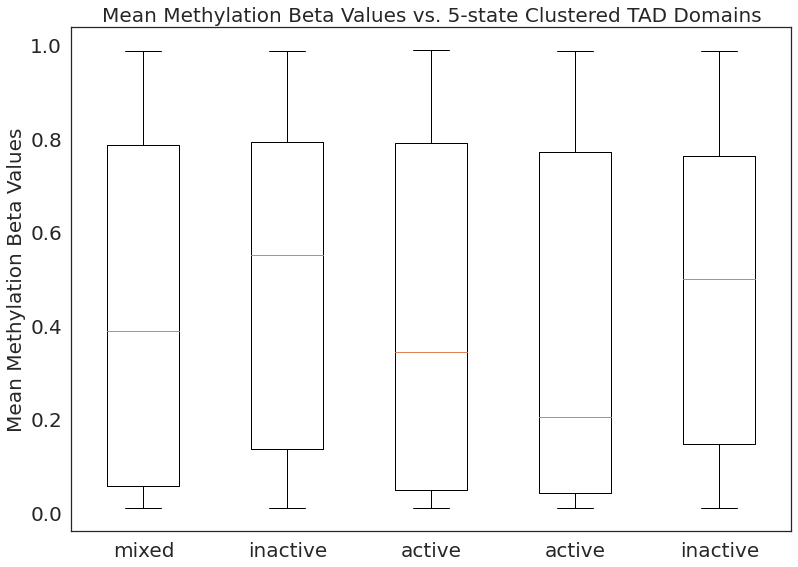

In [17]:
data = [mean_beta_label0, mean_beta_label1, mean_beta_label2, mean_beta_label3, mean_beta_label4]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
boxplt = ax.boxplot(data)
plt.ylabel("Mean Methylation Beta Values", fontsize = 20)
plt.title("Mean Methylation Beta Values vs. 5-state Clustered TAD Domains", fontsize=20)
ax.set_xticklabels(['mixed', 'inactive','active', 'active', 'inactive'], fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [21]:
data_sns1 = pd.DataFrame()
data_sns1["Mean Methylation Beta Values"] = mean_beta_label2
data_sns1["TAD Type"] = "Active 1"

data_sns2 = pd.DataFrame()
data_sns2["Mean Methylation Beta Values"] = mean_beta_label3
data_sns2["TAD Type"] = "Active 2"

data_sns3 = pd.DataFrame()
data_sns3["Mean Methylation Beta Values"] = mean_beta_label1
data_sns3["TAD Type"] = "Inactive 1"

data_sns4 = pd.DataFrame()
data_sns4["Mean Methylation Beta Values"] = mean_beta_label4
data_sns4["TAD Type"] = "Inactive 2"

data_sns5 = pd.DataFrame()
data_sns5["Mean Methylation Beta Values"] = mean_beta_label0
data_sns5["TAD Type"] = "Mixed"

frames = [data_sns1, data_sns2, data_sns3, data_sns4, data_sns5]
all_data = pd.concat(frames)
all_data

Mean Methylation Beta Values  TAD Type
0                          0.061475  Active 1
1                          0.188451  Active 1
2                          0.737047  Active 1
3                          0.406357  Active 1
4                          0.644516  Active 1
...                             ...       ...
12413                      0.163846     Mixed
12414                      0.020127     Mixed
12415                      0.858052     Mixed
12416                      0.656495     Mixed
12417                      0.188240     Mixed

[54001 rows x 2 columns]

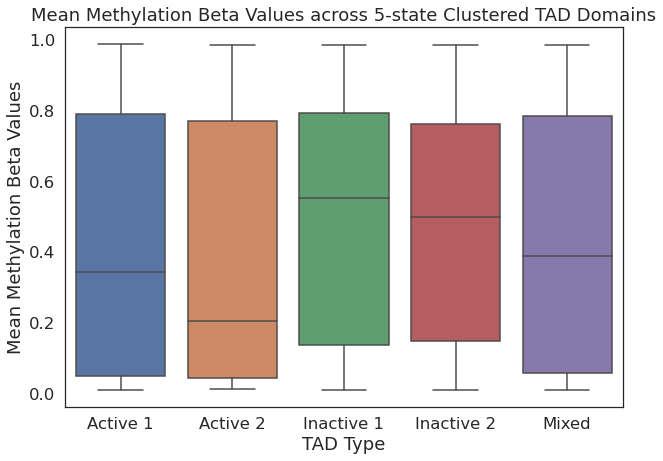

In [29]:
sns.set(font_scale=1.5)
sns.set_style("white")
fig = plt.figure(figsize =(10, 7))
sns.boxplot(x="TAD Type", y="Mean Methylation Beta Values", data=all_data)
plt.title("Mean Methylation Beta Values across 5-state Clustered TAD Domains")
plt.savefig("../plots/dna_methylation_tads.pdf")
plt.savefig("../plots/dna_methylation_tads.png")